# Exchange Rates Visualization

In this short project, we will work with a dataset describing Euro daily [exchange rates](https://en.wikipedia.org/wiki/Exchange_rate) between 1999 and 2024. The dataset was compiled and made available by  Daria Chemkaeva, with the source based on the European Central Bank. It can be found on [Kaggle](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020). Please note that this dataset is updated regularly and was downloaded for this project in August 2024.

Our goal for this project is to represent the data we find in forms of effective explanatory data visualization. As we explore the dataset, we will generate a variety of graphs representing correlations or relationships between different aspects of the data.

Let's start by importing our libraries and exploring our dataset.

### Exploring the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.dates as mdates
%matplotlib inline

exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614
1,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
2,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
3,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
4,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171


In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

As we study our dataset above, we can see that our dataset contains 41 columns and 6535 rows. In examining the rows, we notice that some of the columns seem to hold null values such as `[Slovenian tolar ]`, `[Maltese lira ]`, and `[Cypriot pound ]`. Lastly, we discern that most of the columns are classified as string or object data types, while `[Iceland krona ]`, `[Romanian leu ] `, and `[Turkish lira ]` are the only three columns labeled as float data types.

Before we begin generating our graphs, it's evident that we need to conduct some data cleaning. We are primarily going to focus on the exchange rate between the euro and the American dollar (EURO-USD), so we will clean the `[US dollar ]` and `Period\Unit:` columns first.

### Close Examination and Cleaning

In [3]:
# renaming the '[US dollar ]' and 'Period\Unit:' columns
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates.head()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [4]:
# isolating the 'Time' and 'US_dollar' columns
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

# examining the 'US_dollar' column values
euro_to_dollar['US_dollar'].value_counts() # 62 '-' characters

US_dollar
-         62
1.2276     9
1.0808     8
1.0867     8
1.1215     8
          ..
1.054      1
1.0591     1
1.0558     1
1.0569     1
1.1529     1
Name: count, Length: 3785, dtype: int64

In [5]:
# dropping the '-' characters from the 'US_dollar' column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6473 entries, 0 to 6534
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6473 non-null   datetime64[ns]
 1   US_dollar  6473 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 151.7 KB


Above we have conducted several cleaning manuvers with the `Time` and `US_dollar` columns. This done, we can now move on to generating our graphs. The first graph we are going to create is a line plot visualizing the evolution of the euro-dollar exchange rate.

### Overview Graph

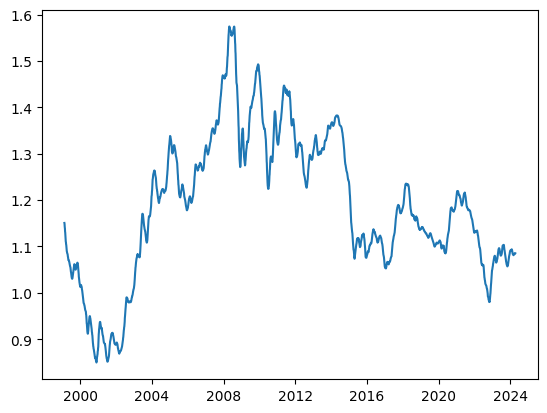

In [6]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

In our new graph, we can see the change in the monthly EURO-USD exchange rate over the past 24 years. We notice a drastic low between 2000 and 2004 and a drastic peak around 2008. Since 2008, the exchange rate has generally decreased, indicating that the dollar has increased in value or appreciated over the last 15 years.

Now that we have seen the general overview of the exchange rate, we will move on to a more specific investigation: Do world events affect exchange rates? To determine this, we will split our dataset into three sections around a large global event: the COVID-19 pandemic. Once we have sectioned out our dataset, we will then create a graph outlining our three ranges and the world events surrounding them.

### Specific Purpose Visualization

In [7]:
before_years = euro_to_dollar["Time"].dt.year.between(2015, 2018)
before = euro_to_dollar[before_years]
around_years = euro_to_dollar["Time"].dt.year.between(2019, 2021)
around = euro_to_dollar[around_years]
after_years = euro_to_dollar["Time"].dt.year.between(2022, 2024)
after = euro_to_dollar[after_years]

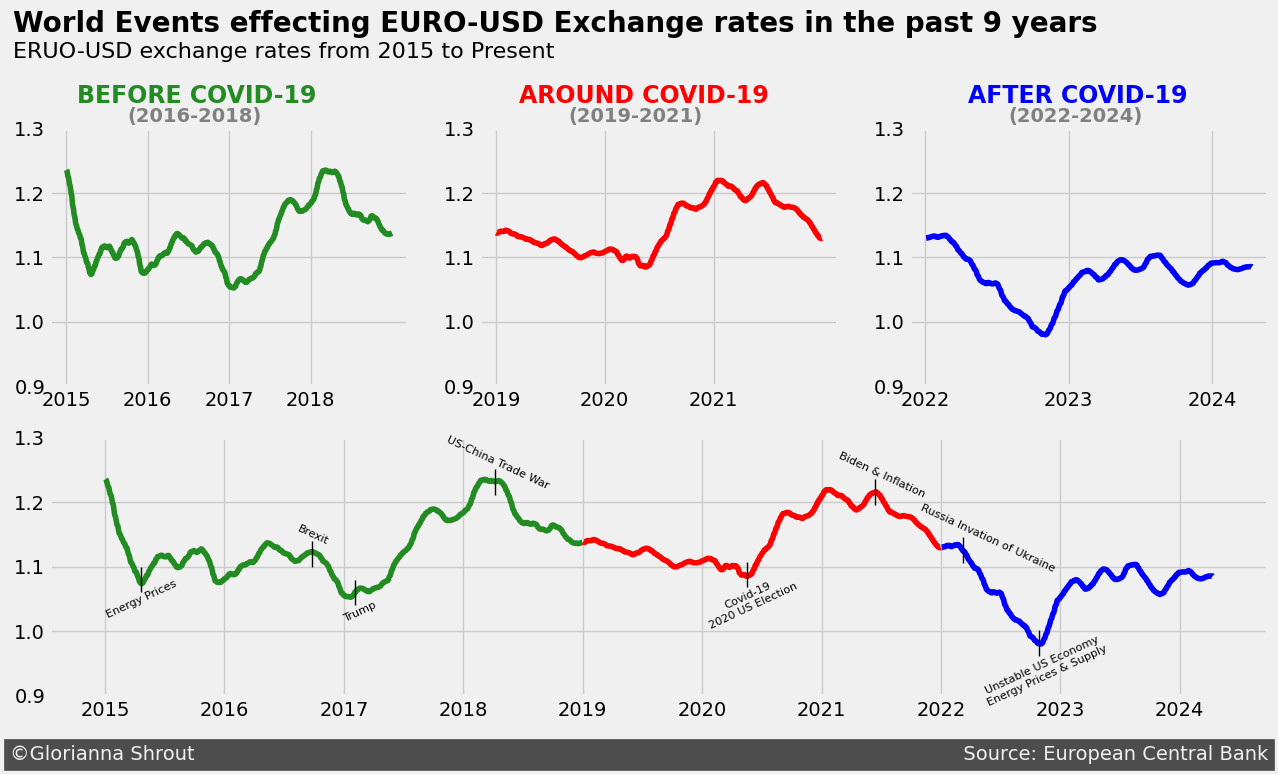

In [9]:
#Generate 4 separate graphs, 3 small on top, one large underneath
style.use("fivethirtyeight")
fig = plt.figure(figsize=(14, 7))
gs = fig.add_gridspec(2, 3)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, :])

#Plot 1) A graph for the range before COVID-19

ax1.plot(before["Time"], before["rolling_mean"], color = "forestgreen")
ax1.set_ylim([0.9, 1.3])
ax1.set_xticks([mdates.datestr2num("2015-01-01"),
                mdates.datestr2num("2016-01-01"),
                mdates.datestr2num("2017-01-01"),
                mdates.datestr2num("2018-01-01")])
ax1.set_xticklabels(["2015", "2016", "2017", "2018"])
ax1.text(mdates.datestr2num("2015-02-20"), 1.34, "BEFORE COVID-19", weight="bold", c="forestgreen", size=17)
ax1.text(mdates.datestr2num("2015-10-01"), 1.31, "(2016-2018)", weight="bold", c="grey", size=14)

#Plot 2) A graph for the range around COVID-19

ax2.plot(around["Time"], around["rolling_mean"], color = "red")
ax2.set_ylim([0.9, 1.3])
ax2.set_xticks([mdates.datestr2num("2019-01-01"),
                mdates.datestr2num("2020-01-01"),
                mdates.datestr2num("2021-01-01")])
ax2.set_xticklabels(["2019", "2020", "2021"])
ax2.text(mdates.datestr2num("2019-03-20"), 1.34, "AROUND COVID-19", weight="bold", c="red", size=17)
ax2.text(mdates.datestr2num("2019-09-01"), 1.31, "(2019-2021)", weight="bold", c="grey", size=14)

#Plot 3) A graph for the period after COVID

ax3.plot(after["Time"], after["rolling_mean"], color = "blue")
ax3.set_ylim([0.9, 1.3])
ax3.set_xticks([mdates.datestr2num("2022-01-01"),
                mdates.datestr2num("2023-01-01"),
                mdates.datestr2num("2024-01-01")])
ax3.set_xticklabels(["2022", "2023", "2024"])
ax3.text(mdates.datestr2num("2022-04-20"), 1.34, "AFTER COVID-19", weight="bold", c="blue", size=17)
ax3.text(mdates.datestr2num("2022-08-01"), 1.31, "(2022-2024)", weight="bold", c="grey", size=14)

#Plot 4) A graph combining all 3 in their own colour across one timeline

ax4.plot(before["Time"], before["rolling_mean"], color = "forestgreen")
ax4.plot(around["Time"], around["rolling_mean"], color = "red")
ax4.plot(after["Time"], after["rolling_mean"], color = "blue")
ax4.set_ylim([0.9, 1.3])
ax4.tick_params(bottom=False)
ax4.axhline(y = 0.90, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.85, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.80, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.75, color = "black", linewidth = 1.5, alpha = 0.1)
ax4.axhline(y = 0.70, color = "black", linewidth = 1.5, alpha = 0.1)

# Adding a title and subtitle
ax1.text(16200.0, 1.45, "World Events effecting EURO-USD Exchange rates in the past 9 years", weight="bold", c="black", size=20)
ax1.text(16200.0, 1.41, "ERUO-USD exchange rates from 2015 to Present", weight="normal", c="black", size=16)


# Marking world events

# Energy prices
ax4.axvline(16546.315, c='black', alpha=1.0, linewidth=1, ymin=0.4, ymax=0.5)
ax4.text(16435.0, 1.02, "Energy Prices", size='xx-small', rotation=25.0)

# Brexit
ax4.axvline(17068.0, c='black', alpha=1.0, linewidth=1, ymin=0.5, ymax=0.6)
ax4.text(17020.0, 1.135, "Brexit", size='xx-small', rotation=-25.0)

# Trump
ax4.axvline(17201.0, c='black', alpha=1.0, linewidth=1, ymin=0.35, ymax=0.45)
ax4.text(17160.0, 1.015, "Trump", size='xx-small', rotation=25.0)

# US-China Trade War
ax4.axvline(17627.5, c='black', alpha=1.0, linewidth=1, ymin=0.78, ymax=0.88)
ax4.text(17475.5, 1.221, "US-China Trade War", size='xx-small', rotation=-25.0)

# Covid-19 & 2020 US Election
ax4.axvline(18399.0, c='black', alpha=1.0, linewidth=1, ymin=0.42, ymax=0.52)
ax4.text(18325.0, 1.035, "Covid-19", size='xx-small', rotation=25.0)
ax4.text(18279.0, 1.004, "2020 US Election", size='xx-small', rotation=25.0)

# Biden & Inflation
ax4.axvline(18790.0, c='black', alpha=1.0, linewidth=1, ymin=0.74, ymax=0.84)
ax4.text(18675.0, 1.208, "Biden & Inflation", size='xx-small', rotation=-25.0)

# Russia invation of Ukraine
ax4.axvline(19060.0, c='black', alpha=1.0, linewidth=1, ymin=0.515, ymax=0.615)
ax4.text(18925.0, 1.0915, "Russia Invation of Ukraine", size='xx-small', rotation=-25.0)

# Unstable US Economy & Energy Prices/Supply
ax4.axvline(19293.0, c='black', alpha=1.0, linewidth=1, ymin=0.155, ymax=0.255)
ax4.text(19125.0, 0.903, "Unstable US Economy", size='xx-small', rotation=25.0)
ax4.text(19130.0, 0.884, "Energy Prices & Supply", size='xx-small', rotation=25.0)

# Adding signature
ax4.text(16145.0, 0.8, '©Glorianna Shrout' + ' '*123 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

### Analysis

Exchange rates, international trade, inflation, the market, monetary policies, politics, and prices are all woven together in the complicated web of world economics in which we live. With such a delicate balance in place, changes can often create significant ripple effects. World events, however great or small they may seem, usually impact economics in one way or another. Whether it is a new political regime or policy, disease, natural disasters, or conflicts, the domino effect of world events on economics can be quite drastic.

In our graph above, we can see several world events that affected the EURO-USD exchange rate. The change in energy prices in 2015 caused the dollar to depreciate. Brexit, or the British exit from the European  Union, caused the Euro to depreciate in 2016. The election and inauguration of Donald Trump as the US President in 2017 caused the dollar to depreciate. The US-China trade war, which started in March  2018, caused the dollar to appreciate for quite some time. In 2020, the  US election and the COVID-19 pandemic had quite an effect on world economics, generally causing the US dollar to depreciate. The Biden administration paired with inflation, in 2021, caused the dollar to apricate. This appreciation of the dollar from 2021 continued into 2022, encouraged by the Russian invasion of Ukraine, until September of 2022. Leading up to September, the US economy was showing signs of instability, which became more apparent in September, along with uncertainty around energy prices and supply.

From the pattern above, we can conclude that world events undoubtedly affect exchange rates. Now, however, we are led to ask why they affect exchange rates. This has to do largely with supply and demand. Exchange rates are simply the value of one currency compared to another.  Therefore, when there is a higher demand for one currency, it appreciates,  or raises in value, and vice versa. However, for there to be a demand for something, there must be some kind of customer for the item, right? Yes, in the world of foreign exchange, these customers are called investors. Investors usually buy or convert their currency to a currency with more value or stability. Once they have a good amount of the appreciated currency, they can sell it, or use it to sell other items and make a sizeable profit.

Let's use the unstable US market in September 2022 as an example to show why world events affect exchange rates. With inflation building up in 2021 and 2022, and energy prices and supply becoming uncertain because of the Russian-Ukraine conflict, by September 2022, the US  market was recognized as unstable. This alarmed investors, who realized that an unstable US market could mean that the value of the US dollar was about to fall. With this realization, investors flocked elsewhere,  exchanging their US currency with other currencies. Thus, the US dollar, no longer in high demand, or less valuable to investors, experienced a depreciation in exchange rate. On the graph, this translates to an upward spike, meaning that the Euro was more valuable than the dollar,  as the dollar continued to depreciate or lose value for a time.

So we see that if investors sense volatility or instability in a currency due to any world event, from a new political party rising to power, to a natural disaster (usually in smaller countries), to a conflict between countries, they will quickly shy away from that currency, causing it to lose value, and thus changing the exchange rate.

### Conclusion

In this project, we analyzed a dataset of Euro Exchange Rates based on data provided by the European Central Bank, with a focus on the EURO-USD exchange rate. Using Data Visualization, we created a graph to illustrate the correlation between world events and exchange rates. Our objective was to demonstrate the effectiveness of Data Visualization in analyzing large datasets. While this is only one style of Data Visualization, it shows how useful it can be to help envision and explain any large dataset, which can be very beneficial to any company or organization.